# Importing Libraries 

In [25]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import sklearn.metrics as metrics
from io import StringIO  
import pydotplus


# Models' Creation with The First DataSet 

# Loading The Dataset 

In [16]:
dt_features = pd.read_csv('./Features_Selection_Mansfield_Project_2.csv' ,  encoding='latin-1')
dt_features.head(5)

,Date,All Employee Const.,Housing Unt. Under Const,Industrial Production: Construction Supplies Index,Avg. Hourly Earn All Employees Const,Real_GDP_Construction,"All Employees, Res. Contractor",New Manuf Homes Avg Sales,Indust Product Total Index,Sales_UND
0,1/1/2017,6459,1080.5,92.4725,28.59,1386.8,1821.1,44900,98.7446,1.018430
1,2/1/2017,6527,1088.5,93.6918,28.50,1386.8,1830.9,48700,98.3676,1.038805
2,3/1/2017,6634,1090.7,96.3402,28.67,1386.8,1850.3,50800,99.1065,2.782969
3,4/1/2017,6820,1102.4,98.8736,28.58,1381.3,1901.1,47400,100.0363,1.311840
4,5/1/2017,6998,1119.2,101.9561,28.65,1381.3,1954.1,49100,100.1470,1.925150


In [17]:
dt_features.index = pd.to_datetime(dt_features['Date'])
dt_features.drop("Date", axis = 1, inplace = True)
dt_features.head(5)

,All Employee Const.,Housing Unt. Under Const,Industrial Production: Construction Supplies Index,Avg. Hourly Earn All Employees Const,Real_GDP_Construction,"All Employees, Res. Contractor",New Manuf Homes Avg Sales,Indust Product Total Index,Sales_UND
Date,,,,,,,,,
2017-01-01,6459,1080.5,92.4725,28.59,1386.8,1821.1,44900,98.7446,1.018430
2017-02-01,6527,1088.5,93.6918,28.50,1386.8,1830.9,48700,98.3676,1.038805
2017-03-01,6634,1090.7,96.3402,28.67,1386.8,1850.3,50800,99.1065,2.782969
2017-04-01,6820,1102.4,98.8736,28.58,1381.3,1901.1,47400,100.0363,1.311840
2017-05-01,6998,1119.2,101.9561,28.65,1381.3,1954.1,49100,100.1470,1.925150


# Dropping 'Sales UND' from the original data

In [18]:
dt_variables = dt_features.drop(['Sales_UND'], axis=1)
dt_variables.head(5)

,All Employee Const.,Housing Unt. Under Const,Industrial Production: Construction Supplies Index,Avg. Hourly Earn All Employees Const,Real_GDP_Construction,"All Employees, Res. Contractor",New Manuf Homes Avg Sales,Indust Product Total Index
Date,,,,,,,,
2017-01-01,6459,1080.5,92.4725,28.59,1386.8,1821.1,44900,98.7446
2017-02-01,6527,1088.5,93.6918,28.50,1386.8,1830.9,48700,98.3676
2017-03-01,6634,1090.7,96.3402,28.67,1386.8,1850.3,50800,99.1065
2017-04-01,6820,1102.4,98.8736,28.58,1381.3,1901.1,47400,100.0363
2017-05-01,6998,1119.2,101.9561,28.65,1381.3,1954.1,49100,100.1470


# Data Preparation

# Data Standardization by Feature standardization

In [19]:
dt_variables.Std = (dt_variables-dt_variables.mean())/dt_variables.std()
dt_variables.Std.head(5)

C:\Users\yrive\AppData\Local\Temp/ipykernel_4712/3843959734.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dt_variables.Std = (dt_variables-dt_variables.mean())/dt_variables.std()


,All Employee Const.,Housing Unt. Under Const,Industrial Production: Construction Supplies Index,Avg. Hourly Earn All Employees Const,Real_GDP_Construction,"All Employees, Res. Contractor",New Manuf Homes Avg Sales,Indust Product Total Index
Date,,,,,,,,
2017-01-01,-2.364593,-1.176441,-1.483290,-1.581593,-0.312238,-2.236416,-1.779488,-0.309974
2017-02-01,-2.159192,-1.109873,-1.212768,-1.661561,-0.312238,-2.134123,-0.970823,-0.400699
2017-03-01,-1.835987,-1.091567,-0.625175,-1.510510,-0.312238,-1.931625,-0.523930,-0.222884
2017-04-01,-1.274153,-0.994211,-0.063098,-1.590478,-0.520296,-1.401372,-1.247472,0.000871
2017-05-01,-0.736485,-0.854418,0.620807,-1.528281,-0.520296,-0.848155,-0.885701,0.027510


# New Variables to Create the models

In [20]:
dt_trained = dt_variables.Std[['All Employee Const.','Housing Unt. Under Const', 'Industrial Production: Construction Supplies Index',
                               'Avg. Hourly Earn All Employees Const', 'Real_GDP_Construction', 'All Employees, Res. Contractor', 
                               'New Manuf Homes Avg Sales', 'Indust Product Total Index']]

dt_target = dt_features[['Sales_UND']]


#  Splitting Dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(dt_trained, dt_target, test_size = 0.3 , random_state = 0)

print("Total Data (100%):",len(dt_trained))
print("X_Testing Data (30%):" ,len(x_test))
print("Y_Testing Data (30%):" ,len(y_test))
print("X_Training Data (70%):",len(x_train))
print("Y_Training Data (70%):",len(y_train))

Total Data (100%): 50
X_Testing Data (30%): 15
Y_Testing Data (30%): 15
X_Training Data (70%): 35
Y_Training Data (70%): 35


# 1. Lasso Regression Model

In [22]:
modelLasso = Lasso(alpha=0.1).fit(x_train, y_train)
y_predict_lasso = modelLasso.predict(x_test)


# Lasso Model Evaluation

In [26]:
# Model Evaluation
mae = metrics.mean_absolute_error(y_test, y_predict_lasso)
mse = metrics.mean_squared_error(y_test, y_predict_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_predict_lasso)

print("Model Evaluation")
print(30*(''))
print("MAE(Mean absolute error):",mae.round(2))
print("MSE(Mean Squared Error):", mse.round(2))
print("RMSE(Root Mean Squared Error) :", rmse.round(2))
print("R-Squared(Coefficient of determination):", r2.round(2))
print(30*(''))
print("Coef. LASSO")
print(modelLasso.coef_.round(2))

Model Evaluation

MAE(Mean absolute error): 0.6
MSE(Mean Squared Error): 0.6
RMSE(Root Mean Squared Error) : 0.77
R-Squared(Coefficient of determination): 0.37

Coef. LASSO
[-0.   -0.    0.   -0.47 -0.    0.   -0.    0.03]


# Model Plot

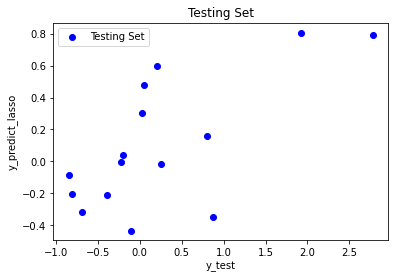

In [35]:
plt.scatter(y_test, y_predict_lasso, color="blue", label="Testing Set")
plt.title ('Testing Set')
plt.ylabel('y_predict_lasso')
plt.xlabel('y_test')
plt.legend()
plt.show()

In [36]:
y_predict_lasso_train = modelLasso.predict(x_train)

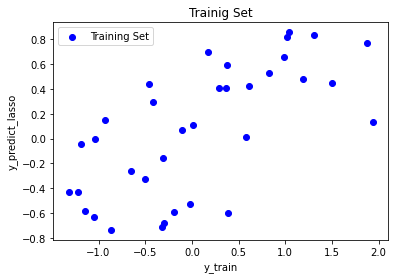

In [38]:
plt.scatter(y_train, y_predict_lasso_train, color="blue", label="Training Set")
plt.title ('Trainig Set')
plt.ylabel('y_predict_lasso')
plt.xlabel('y_train')
plt.legend()
plt.show()

In [33]:
# Lasso Conclusion 

# From the evaluation of the lasso Coefficient, it could be eliminated the following features:

# All Employee Const
# Housing Unt. Under Const
# Industrial Production: Construction Supplies Index
# Real_GDP_Construction
# All Employees, Res. Contractor
# New Manuf Homes Avg Sales

# The following features should be evaluated for further advances:

# Avg. Hourly Earn All Employees Const
# Indust Product Total Index


# 2. Decision Tree Regression 

In [29]:
Tree_model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(x_train,y_train)
y_pred_tree = Tree_model.predict(x_test)
y_pred_tree 

array([-1.03952025,  0.59104841,  0.59104841, -1.31968669,  1.32236771,
       -0.44454862, -1.20660133, -1.20660133,  1.94043185,  1.32236771,
       -1.20660133, -1.20660133,  0.18491623, -1.20660133,  0.18491623])

# Tree Model Evaluation

In [30]:
# Model Evaluation
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_pred_tree)

print("Model Evaluation")
print(30*(''))
print("MAE(Mean absolute error):",mae.round(2))
print("MSE(Mean Squared Error):", mse.round(2))
print("RMSE(Root Mean Squared Error) :", rmse.round(2))
print("R-Squared(Coefficient of determination):", r2.round(2))

Model Evaluation

MAE(Mean absolute error): 0.77
MSE(Mean Squared Error): 0.84
RMSE(Root Mean Squared Error) : 0.92
R-Squared(Coefficient of determination): 0.11


# Model Graph

In [32]:
dot_data = StringIO()
export_graphviz(Tree_model, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = dt_trained.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FeatureSelectionTree_2.png')


True

In [34]:
# Decision Tree Conclusion 

# From the decision tree model evaluation, it could be concluded that 
# the following features are the best to predict the Mansfield sales in the future: 

# Indust Product Total Index
# Housing Unt. Under Const


# Conclusion

In [ ]:
# From the evaluation of these model, the best variables that fit to the prediction sale are:

# Avg. Hourly Earn All Employees Const
# Indust Product Total Index
# Indust Product Total Index